In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
X_train = pd.read_csv("train.csv")
y_train = pd.read_csv("train_label.csv", header=None)# Data no incluye primer valor como columna

In [3]:
X_test = pd.read_csv("test.csv")
y_test = pd.read_csv("test_label.csv", header=None) #Data no incluye el primer valor como columna

In [4]:
display(X_train.head(), X_train.shape, y_train.shape)

,Unnamed: 0,v0,v1,v2,v3,v4,v5,v6,v7,v8,...,ae61,ae62,ae63,ae64,ae65,ae66,ae67,ae68,d69,d70
0,1651,0.00,143270.10,100.0,0.0,0.0,63090564.44,4199850.00,0.0,6240000.0,...,0,0,0,0,0,0,0,0,0,0
1,1370,0.00,1403461.97,90.0,10.0,29.0,8013913.78,8177030.69,44951.9,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2649,19800.24,63401.41,100.0,0.0,0.0,323384.60,67610.22,0.0,0.0,...,1,0,0,0,0,0,0,0,1,0
3,564,0.00,10585032.22,100.0,0.0,5.0,29596681.95,186964.54,0.0,4500000.0,...,0,0,0,0,0,0,0,0,0,0
4,2728,0.00,11259663.09,78.0,22.0,0.0,33626595.71,0.00,0.0,3972827.7,...,0,1,0,0,0,0,0,0,0,0


(2189, 72)

(2189, 1)

Entiendo que los valores ya fueron convertidos a OneHotEnconder, y que cada una de las letras representan una variable y el número que lo acompaña representa la categoria de dicha varible

In [5]:
y_train.columns = ["output"]
y_test.columns = ["output"]

In [6]:
y_train.output.value_counts()

0.0    1760
1.0     429
Name: output, dtype: int64

In [7]:
#Corroboramos el porcentaje de imbalance data dentro del dataaset
imbalance = y_train.output.value_counts()
imbalance_result = [x/imbalance.sum()*100 for x in imbalance]
pd.DataFrame(imbalance_result, index=["Pagado a Tiempo", "No Pagado a Tiempo"], columns=["Proporcion (%)"])

,Proporcion (%)
Pagado a Tiempo,80.40201
No Pagado a Tiempo,19.59799


In [8]:
#Corroboramos el porcentaje de imbalance data dentro del dataset de testing 
imbalance_test = y_test.output.value_counts()
imbalance_result_test = [x/imbalance.sum()*100 for x in imbalance]
pd.DataFrame(imbalance_result_test, index=["Pagado a Tiempo", "No Pagado a Tiempo"], columns=["Proporcion (%)"])

,Proporcion (%)
Pagado a Tiempo,80.40201
No Pagado a Tiempo,19.59799


### Consideracion para imbalanced data.

Ambos modelos (training and testing) estan distribuidos en una proporcion de 80:20, por lo cual debemos considerar que al momento de evaluar accuracy debe ser mayor al 80% (si de realizar el modelo en base al data imbalanced), ya que en el peor de los escenarios el modelo predecira el 80% de las veces bien el testing.

In [9]:
X_train.describe()

,Unnamed: 0,v0,v1,v2,v3,v4,v5,v6,v7,v8,...,ae61,ae62,ae63,ae64,ae65,ae66,ae67,ae68,d69,d70
count,2189.000000,2.189000e+03,2.189000e+03,2189.000000,2189.000000,2189.000000,2.189000e+03,2.189000e+03,2.189000e+03,2.189000e+03,...,2189.000000,2189.000000,2189.000000,2189.000000,2189.000000,2189.000000,2189.000000,2189.000000,2189.000000,2189.0
mean,1457.217908,2.789336e+04,2.498074e+06,87.098675,10.317953,3.608040,7.332287e+07,1.011043e+07,1.126268e+04,2.283687e+06,...,0.034719,0.371859,0.004111,0.021928,0.004568,0.014619,0.007766,0.044312,0.122430,0.0
std,842.158691,2.770920e+05,3.713769e+06,29.548930,25.922405,8.477891,3.009257e+08,4.209394e+07,1.540442e+05,3.283374e+06,...,0.183109,0.483412,0.064003,0.146481,0.067450,0.120048,0.087803,0.205835,0.327857,0.0
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,731.000000,0.000000e+00,1.411988e+04,100.000000,0.000000,0.000000,2.898817e+06,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,1453.000000,0.000000e+00,1.781006e+05,100.000000,0.000000,0.000000,1.623024e+07,1.970460e+04,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,2188.000000,0.000000e+00,3.958601e+06,100.000000,0.000000,5.000000,3.308427e+07,2.560791e+06,0.000000e+00,4.355600e+06,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,2907.000000,5.030246e+06,1.257078e+07,100.000000,100.000000,183.000000,3.283312e+09,4.415314e+08,2.427617e+06,1.000000e+07,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


La columna d70 no tiene ningun tipo de valor deberiamos eliminarla del calculo

In [10]:
X_train.drop(labels=['d70'], axis=1, inplace=True)
X_test.drop(labels=['d70'], axis=1, inplace=True)

Consideramos que los primeros 38 columnas (aquellas que tienen como prefijo 'v'),  seran considerados vairables continuas, aunque probablemente la primera columna (Unnamed: 0) sea algun id del dataset, el resto seran datos resultados de categorias.

Para futuras consideraciones sobre un pipeline:
- Para modelos lineales:
* A estos primeros debemos estandarizarlos (v0-v37). Utilizando column_transformer a las varibles con prefijo 'v' 
* Resampling: Oversampling o undersampling (evaluaremos dependiendo del performance del modelo bajo ambos escenarios y elegiremos el que mejor se adecue)
* Utilizare la libreria eli5 para encontrar el "weight" que aporta al modelo en base a LogisticRegression o SVC
* Aplicar RandomizedSearchCV para calibrar los mejores parametros y evaluar mediante confusion_matrix, Classification_report y roc_auc (para evaluar en funcion de gini)
 
Note: Utilizare primero el modelo lineal para tener una referencia por el cual guiarme para hacer los modelos no lineales

-Para otros modelos:
* Utilizar los mismos atributos del modelo para evaluar el feature_importance (particularmente ExtraTree)
* Aplicar RandomizedSearchCV y realizar las evaluaciones metricas.


In [11]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

## Modelo Lineal

In [12]:
 from sklearn.preprocessing import StandardScaler
 from sklearn.compose import ColumnTransformer

In [13]:
#Datos a ser utilizados para la standarization
col_standard = X_train.iloc[:,0:38].columns.tolist()
print(col_standard)

['Unnamed: 0', 'v0', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20', 'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'v29', 'v30', 'v31', 'v32', 'v33', 'v34', 'v35', 'v36']


In [14]:
ct = ColumnTransformer([("stand", StandardScaler(), col_standard)], remainder='passthrough')
X_train_stand = pd.DataFrame(ct.fit_transform(X_train), columns=X_train.columns)
X_test_stand = pd.DataFrame(ct.transform(X_test), columns=X_test.columns)
X_train_stand.head()

,Unnamed: 0,v0,v1,v2,v3,v4,v5,v6,v7,v8,...,ae60,ae61,ae62,ae63,ae64,ae65,ae66,ae67,ae68,d69
0,0.230154,-0.100688,-0.634219,0.436709,-0.398123,-0.425680,-0.034011,-0.140446,-0.073130,1.205229,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.103588,-0.100688,-0.294812,0.098210,-0.012268,2.995764,-0.217076,-0.045941,0.218748,-0.695690,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.415475,-0.029214,-0.655730,0.436709,-0.398123,-0.425680,-0.242639,-0.238636,-0.073130,-0.695690,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-1.060871,-0.100688,2.178058,0.436709,-0.398123,0.164225,-0.145339,-0.235800,-0.073130,0.675165,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.509303,-0.100688,2.359757,-0.307989,0.450757,-0.425680,-0.131944,-0.240242,-0.073130,0.514570,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
corr_data = pd.concat([X_train_stand, y_train], axis=1).corr()

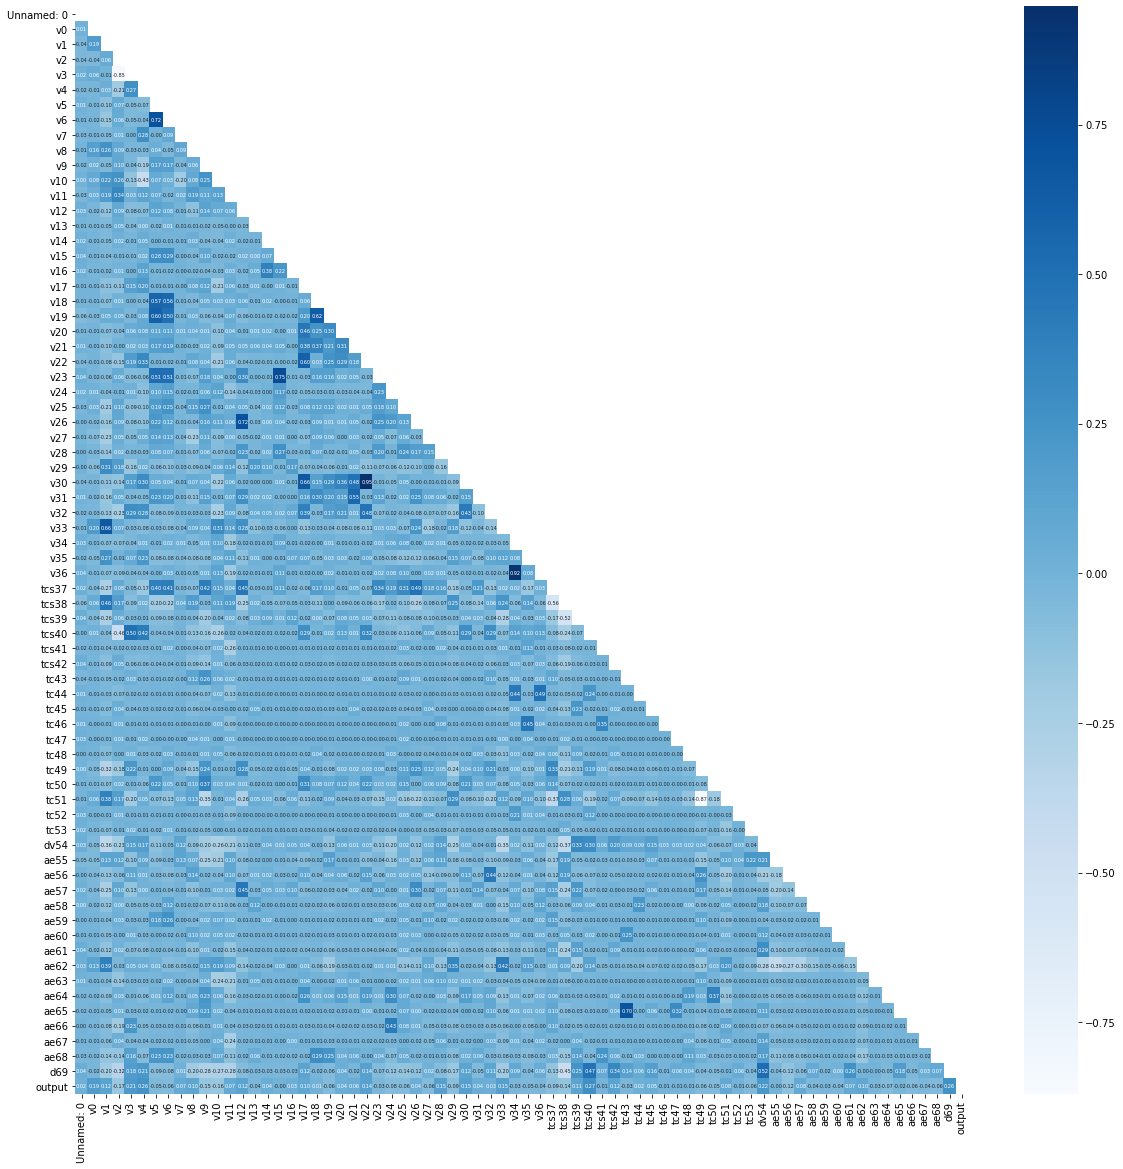

In [16]:
fig, ax = plt.subplots(figsize=(20,20))

mask = np.triu(np.ones_like(corr_data, dtype=np.bool)) #Creamos una mascara para mostrar solo la parte inferior del triangulo
sns.heatmap(corr_data, ax=ax, cmap="Blues", mask=mask, annot=True, annot_kws={"size":5}, fmt=".2f")

De acuerdo a la correlacion V2/V3, V30/V22, V36/v34, tc51/tc49 son mayores al 80%, debemos quedarnos con solo 1 de ellas para evitar colinealidad en el modelamiento del algoritmo


In [17]:
X_train_stand.drop(labels=["v3", "v22", "v36", "tc51" ], axis=1, inplace=True)
X_test_stand.drop(labels=["v3", "v22", "v36", "tc51" ], axis=1, inplace=True)

In [18]:
X_train_stand.shape, X_test_stand.shape

((2189, 67), (548, 67))

Trabajaremos con estas cuatros columnas menos, para evitar colinealidad al momento de evaluar nuestro modelo.

In [135]:
import eli5
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, average_precision_score
lr = LogisticRegression()

In [121]:
params = {
    'penalty': ['none','l1', 'l2'],
    'C':[0.01,.09,1,5,10,25],
    'solver': ['lbfgs', 'liblinear', 'saga']
}

In [122]:
gs = GridSearchCV(lr, param_grid=params, cv=10, scoring='f1', n_jobs=-1, verbose=2)

### Proceso de Oversampling con SMOTE

In [22]:
sm =SMOTE(sampling_strategy='minority',  random_state=6)
X_train_sm, y_train_sm = sm.fit_resample(X_train_stand, y_train)
y_train_sm['output'].value_counts()

1.0    1760
0.0    1760
Name: output, dtype: int64

In [44]:
def printer_results(model, xtest, ytest):

    print("Confusion matrix: \n {}".format(confusion_matrix(ytest.values.ravel(), model.predict(xtest)))),\
    print(classification_report(ytest.values.ravel(), model.predict(xtest)))

    return {
        "Score": round(model.score(xtest.values, ytest.values.ravel()),2),
        "ROC & AUC Score": round(roc_auc_score(ytest.values.ravel(), model.predict_proba(xtest)[:,1]),2),
        "PR-AUC Score": round(average_precision_score(ytest.values.ravel(), model.predict_proba(xtest)[:,1]),2)
        }

### Nota:
Utilizare el ROC_AUC como metrica para la evaluacion del modelo, a pesar de que el desafio sea en base a Gini, justifico dicho calculo en base a la relacion de Gini coefficient y ROC_AUC : $ Gini = 2 \cdot {AucRoc} - 1$

In [123]:
gs.fit(X_train_sm, y_train_sm)

Fitting 10 folds for each of 54 candidates, totalling 540 fits


GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.09, 1, 5, 10, 25],
                         'penalty': ['none', 'l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'saga']},
             scoring='f1', verbose=2)

In [124]:
SM_result = printer_results(gs.best_estimator_, X_test_stand, y_test)

Confusion matrix: 
 [[366  74]
 [ 12  96]]
              precision    recall  f1-score   support

         0.0       0.97      0.83      0.89       440
         1.0       0.56      0.89      0.69       108

    accuracy                           0.84       548
   macro avg       0.77      0.86      0.79       548
weighted avg       0.89      0.84      0.85       548



In [125]:
explain_sm = eli5.explain_weights(gs.best_estimator_, feature_names=list(X_train_sm.columns), top=(20,5))
feature_sm = eli5.format_as_dataframe(explain_sm)[:20]
display(explain_sm)

Weight?,Feature
+6.480,tc44
+6.131,tcs41
+5.537,tcs42
+4.602,tcs39
+3.572,ae65
+3.490,tcs38
+3.022,ae61
+2.915,tcs37
+2.854,ae57
+2.555,tcs40


### Proceso de UnderSampling

In [32]:
us =RandomUnderSampler(sampling_strategy='majority', random_state=6)
X_train_us, y_train_us = us.fit_resample(X_train_stand, y_train)
y_train_us['output'].value_counts()

1.0    429
0.0    429
Name: output, dtype: int64

In [126]:
gs.fit(X_train_us, y_train_us)

Fitting 10 folds for each of 54 candidates, totalling 540 fits


GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.09, 1, 5, 10, 25],
                         'penalty': ['none', 'l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'saga']},
             scoring='f1', verbose=2)

In [127]:
US_result = printer_results(gs.best_estimator_, X_test_stand, y_test)

Confusion matrix: 
 [[352  88]
 [ 10  98]]
              precision    recall  f1-score   support

         0.0       0.97      0.80      0.88       440
         1.0       0.53      0.91      0.67       108

    accuracy                           0.82       548
   macro avg       0.75      0.85      0.77       548
weighted avg       0.88      0.82      0.84       548



In [128]:
explain_us = eli5.explain_weights(gs.best_estimator_, feature_names=X_test_stand.columns.tolist(), top=(20,5))
feature_us = eli5.format_as_dataframe(explain_us)[:20]
display(explain_us)

Weight?,Feature
+8.633,ae65
+7.831,tcs41
+5.622,tc44
+3.850,ae61
+3.750,ae57
+3.503,v18
+3.175,tcs42
+3.015,tcs38
+2.838,tcs39
+2.441,d69


### Proceso con data imbalanced 

In [129]:
gs.fit(X_train_stand, y_train)

Fitting 10 folds for each of 54 candidates, totalling 540 fits


GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.09, 1, 5, 10, 25],
                         'penalty': ['none', 'l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'saga']},
             scoring='f1', verbose=2)

In [130]:
imbalanced_result = printer_results(gs.best_estimator_, X_test_stand, y_test)

Confusion matrix: 
 [[407  33]
 [ 34  74]]
              precision    recall  f1-score   support

         0.0       0.92      0.93      0.92       440
         1.0       0.69      0.69      0.69       108

    accuracy                           0.88       548
   macro avg       0.81      0.81      0.81       548
weighted avg       0.88      0.88      0.88       548



In [131]:
explanation = eli5.explain_weights(gs.best_estimator_, feature_names=X_test_stand.columns.tolist())
feature_imbalanced = eli5.format_as_dataframe(explanation)
feature_list = feature_imbalanced.feature[:13].tolist()
display(explanation,feature_list) #Top 13'th most valuable features on imbalaned explanation

Weight?,Feature
+5.419,tcs41
+5.211,tc44
+4.442,tcs42
+3.360,tcs39
+3.152,ae65
+2.727,ae61
+2.466,tcs38
+2.227,tcs37
+2.207,tcs40
+2.177,ae57


['tcs41',
 'tc44',
 'tcs42',
 'tcs39',
 'ae65',
 'ae61',
 'tcs38',
 'tcs37',
 'tcs40',
 'ae57',
 'v12',
 'ae55',
 'ae67']

In [188]:
results = pd.DataFrame([SM_result, US_result, imbalanced_result], index=['SMOTE', 'UnderSampling', 'Imbalanced'])
results

,Score,ROC & AUC Score,PR-AUC Score
SMOTE,0.84,0.92,0.71
UnderSampling,0.82,0.91,0.59
Imbalanced,0.88,0.93,0.76


In [133]:
model_linear = gs.best_estimator_
model_linear

LogisticRegression(C=10, penalty='l1', solver='liblinear')

## Conclusion para LogisticRegression

De acuerdo a los tres procesamientos de resampling, el modelo original siendo el imbalanceado tiene mejores resultados sobre LogisticRegression, dado que para el caso de undersampling y oversampling el 'recall' sobre la variable de interes (preferiblemente 1:No pago a tiempo) es muy alto y la precision muy baja, esto hace que el modelo tienda a considerar que habra mas casos de "no pago a tiempo" del que deberia considerar, y menos del 60% son correctamentes predecidos. En cambio para los casos de datos imbalanceados, esta proporcion son mejores. Esto se demuestra con la metrica "PR-AUC Score". Esta modelo puede mejorar si se aplica algun preprocessing de bining sobre las primeras 37 variables ('vxx'), en lugar de standarizarlas (como fue el caso que hice) y tratarlas todas como categorias.

## Modelo no Lineal

Para modelos no lineales utilizare GradientBoost, suponiendo que la data fue limpiada para omitir gran parte de los outliers. A Pesar de que quiero usar XGBoost, computacionalmente seria mas tiempo y no sabria que tan perjudicioso podria ser.

Utilizare los datos estandarizados ya que para los modelos basados en tree, no hay prueba suficiente que muestre mejoria si el modelo esta estandarizado o no.

In [149]:
from sklearn.ensemble import GradientBoostingClassifier,ExtraTreesClassifier

In [192]:
etc = ExtraTreesClassifier()

,v0,v1,v2,v4,v5,v6,v7,v8,v9,v10,...,ae60,ae61,ae62,ae63,ae64,ae65,ae66,ae67,ae68,d69
0,-0.100688,-0.634219,0.436709,-0.425680,-0.034011,-0.140446,-0.073130,1.205229,-0.298895,-0.189271,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.100688,-0.294812,0.098210,2.995764,-0.217076,-0.045941,0.218748,-0.695690,-0.680089,-1.280959,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.029214,-0.655730,0.436709,-0.425680,-0.242639,-0.238636,-0.073130,-0.695690,-1.289998,-0.247755,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.100688,2.178058,0.436709,0.164225,-0.145339,-0.235800,-0.073130,0.675165,-0.756327,-0.150283,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.100688,2.359757,-0.307989,-0.425680,-0.131944,-0.240242,-0.073130,0.514570,0.234776,0.798446,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2184,-0.100688,-0.672806,0.436709,-0.425680,-0.186139,-0.085735,-0.073130,0.766555,0.158538,1.090863,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2185,-0.100688,-0.632724,0.436709,0.164225,-0.184301,-0.221106,-0.073130,0.607859,-0.527611,-0.234758,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2186,-0.100688,-0.671072,-2.948282,-0.425680,-0.243713,-0.240242,-0.073130,-0.695690,-0.908805,-4.367577,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2187,-0.100688,-0.320232,0.132059,0.990090,-0.217929,-0.018967,0.051255,-0.695690,-0.680089,-2.171205,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [193]:
#Borrare la columna del identificador
X_train_stand.drop("Unnamed: 0", axis=1, inplace=True)

In [194]:
etc.fit(X_train_stand, y_train)

ExtraTreesClassifier()

In [199]:
feature_importance = pd.DataFrame(etc.feature_importances_, index=X_train_stand.columns.tolist(), columns=['feature_importance']).sort_values('feature_importance', ascending=False)
feature_gd = feature_importance[:15].index

In [200]:
X_train_short = X_train_stand[feature_gd]
X_test_short = X_test_stand[feature_gd]

In [201]:
params = {'learning_rate': [0.01, 0.08, 0.2, 0.3],
         'min_samples_split': range(2,20),
         'min_samples_leaf': range(5, 100),
         'max_features': range(2,14)}

In [163]:
gb = GradientBoostingClassifier()

In [207]:
rs = RandomizedSearchCV(gb, params , scoring='accuracy', n_jobs=-1, cv=10, verbose=2)

In [208]:
rs.fit(X_train_short, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.08, 0.2, 0.3],
                                        'max_features': range(2, 14),
                                        'min_samples_leaf': range(5, 100),
                                        'min_samples_split': range(2, 20)},
                   scoring='accuracy', verbose=2)

In [209]:
result_imbalance = printer_results(rs.best_estimator_, X_test_short, y_test)

Confusion matrix: 
 [[419  21]
 [ 23  85]]
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95       440
         1.0       0.80      0.79      0.79       108

    accuracy                           0.92       548
   macro avg       0.87      0.87      0.87       548
weighted avg       0.92      0.92      0.92       548



In [214]:
rs.best_params_

{'min_samples_split': 6,
 'min_samples_leaf': 99,
 'max_features': 11,
 'learning_rate': 0.3}

## Resampling with SMOTE

In [181]:
X_train_sm_short = X_train_sm[feature_list]
X_test_sm_short = X_test_us_short = X_test_stand[feature_list]

In [179]:
rs.fit(X_train_sm_short, y_train_sm)

Fitting 20 folds for each of 10 candidates, totalling 200 fits


RandomizedSearchCV(cv=20, estimator=GradientBoostingClassifier(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.08, 0.2, 0.3],
                                        'max_features': range(2, 14),
                                        'min_samples_leaf': range(5, 100),
                                        'min_samples_split': range(2, 20)},
                   scoring='accuracy', verbose=2)

In [180]:
result_smote = printer_results(rs.best_estimator_, X_test_sm_short, y_test)

Confusion matrix: 
 [[360  80]
 [ 13  95]]
              precision    recall  f1-score   support

         0.0       0.97      0.82      0.89       440
         1.0       0.54      0.88      0.67       108

    accuracy                           0.83       548
   macro avg       0.75      0.85      0.78       548
weighted avg       0.88      0.83      0.84       548



## Resampling with UnderSampling

In [182]:
X_train_us_short = X_train_us[feature_list]

In [183]:
rs.fit(X_train_us_short, y_train_us)

Fitting 20 folds for each of 10 candidates, totalling 200 fits


RandomizedSearchCV(cv=20, estimator=GradientBoostingClassifier(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.08, 0.2, 0.3],
                                        'max_features': range(2, 14),
                                        'min_samples_leaf': range(5, 100),
                                        'min_samples_split': range(2, 20)},
                   scoring='accuracy', verbose=2)

In [184]:
result_under = printer_results(rs.best_estimator_, X_test_us_short, y_test)

Confusion matrix: 
 [[313 127]
 [ 12  96]]
              precision    recall  f1-score   support

         0.0       0.96      0.71      0.82       440
         1.0       0.43      0.89      0.58       108

    accuracy                           0.75       548
   macro avg       0.70      0.80      0.70       548
weighted avg       0.86      0.75      0.77       548



In [215]:
result_gd = pd.DataFrame([result_imbalance, result_smote, result_under], index=['Imbalanced', 'SMOTE', 'UnderSampling'])
result_gd

,Score,ROC & AUC Score,PR-AUC Score
Imbalanced,0.92,0.96,0.85
SMOTE,0.83,0.91,0.73
UnderSampling,0.75,0.88,0.62


In [216]:
model_nonlinear = GradientBoostingClassifier(
    min_samples_split=6,
    min_samples_leaf= 99,
    max_features= 11,
    learning_rate= 0.3)

## Conclusion

De acuerdo a lo realizado para ambos modelos (Lineales y no Lineales) obtuvimos resultados un poco mejor para el modelo no lineal, siendo este de casi un 92% de accuracy, y un 85% en Average Precission-Recall, para este modelo el escenario de prediccion sobre si el credito sera pagado a tiempo tenemos 79% f1-score, siendo el seleccionado el modelo imbalanceado la mejor eleccion. _Se podria mejorar_ si jugamos un poco mas "tunning the hyperparameter", ademas de poder evaluar con mas calma cada una de las variables y considerar si hay outliers que perjudiquen de mas el modelo, probar un XGBoost para mejorar un poco mas la eficacia, y de no ser el camino probar con algun algoritmo de Decission Tree y evaluarlo desde el lado Homogeneo del ensemble model